In [1]:
import ANNarchy as ann
import numpy as np
ann.clear()

ANNarchy 4.6 (4.6.9.3) on darwin (posix). 


In [2]:
Izhikevich_Hamker = ann.Neuron(
parameters="""
    a = 0.02
    b = 0.2
    c = -72.0
    d = 6.0
    n0 = 140.
    n1 = 5.0
    n2 = 0.04
    I = 0.0
    tau_refrac = 10.0
    tau_ampa = 10.0
    tau_gaba = 10.0
    E_ampa = 0.0
    E_gaba = -90.0
    tau_syn = 1.0
    C = 1.0
    v_th = 30.0
""",
equations="""
    I_syn_ex = - g_ampa*(v-E_ampa)
    I_syn_in = - g_gaba*(v-E_gaba)
    I_syn = I_syn_ex + I_syn_in - g_base*v
    dg_base/dt = -g_base/tau_syn : init = 0
    dg_ampa/dt = -g_ampa/tau_ampa : init = 0
    dg_gaba/dt = -g_gaba/tau_gaba : init = 0
    dv/dt = n2*v*v+n1*v+n0 - u/C  + I + I_syn : init = -70.
    du/dt = a*(b*(v)-u) : init = -18.55
""",
spike = """
    v>=v_th
""",
reset = """
    v = c
    u = u+d
""",
refractory = """tau_refrac"""
)

In [3]:
try:
    import shutil
    shutil.rmtree("./annarchy")
    print("Deleted previously compiled network!")
except:
    print("No previously compiled network to delete!")

Deleted previously compiled network!


In [4]:
nNeurons = 10
rate = 10 # Hz
simulation_time = 10000 # ms
transient = 100 # ms

import pickle

filename = "inputs/poisson_"+str(nNeurons)+"_n_"+str(int(rate))+"_Hz_20000_ms.txt"

with open (filename, 'rb') as fp:
    stim = pickle.load(fp)


In [5]:
stimE1 = ann.SpikeSourceArray(spike_times=stim)

exc1 = ann.Population(nNeurons, neuron=Izhikevich_Hamker)
proj = ann.Projection(pre=stimE1, post=exc1, target="ampa")
proj.connect_one_to_one(weights=1.0)

In [6]:
# this is for checking the number of neurons in the generated spike source array
#ann.Global._network[0]["populations"][1].geometry

In [7]:
record_from = ["v", "u", "I_syn", "I_syn_ex", "I_syn_in", "g_base", "g_ampa", "g_gaba"]
n_vars = len(record_from)
exc1_m = ann.Monitor(exc1, record_from, period=1.0) 
exc1_spikes_rec = ann.Monitor(exc1, "spike")
inp_spikes_rec = ann.Monitor(stimE1, "spike")

In [8]:
#ann.compile("-march=native -O2 --clean")
ann.compile()

Compiling... 
OK 


In [9]:
stimE1.reset()
exc1_spikes_rec.pause()
inp_spikes_rec.pause()
ann.simulate(transient)
exc1_spikes_rec.resume()
inp_spikes_rec.resume()
ann.simulate(simulation_time)

In [10]:
ts = exc1_m.times()
exc1_ts = exc1_m.get()
spikes = exc1_spikes_rec.get("spike")
spike_times, spike_senders = exc1_spikes_rec.raster_plot(spikes)

spikes2 = inp_spikes_rec.get("spike")
spike_times2, spike_senders2 = inp_spikes_rec.raster_plot(spikes2)

In [11]:
# This checks if there is a difference between stimulation and ouput spikes
#print(nNeurons == (spike_times == spike_times2))
#print(np.std(spike_times == spike_times2))

In [12]:
spike_times2

array([ 166.,  252.,  284., ..., 9815., 9821., 9923.])

In [13]:
spike_times

array([ 168.,  184.,  254., ..., 9837., 9925., 9944.])

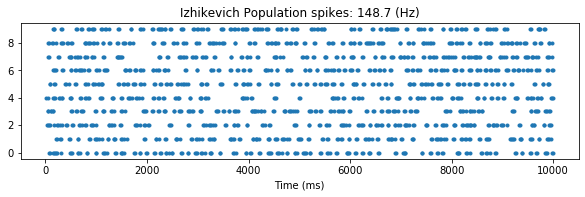

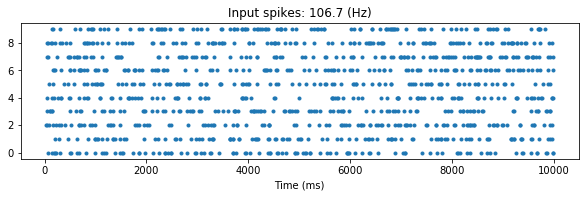

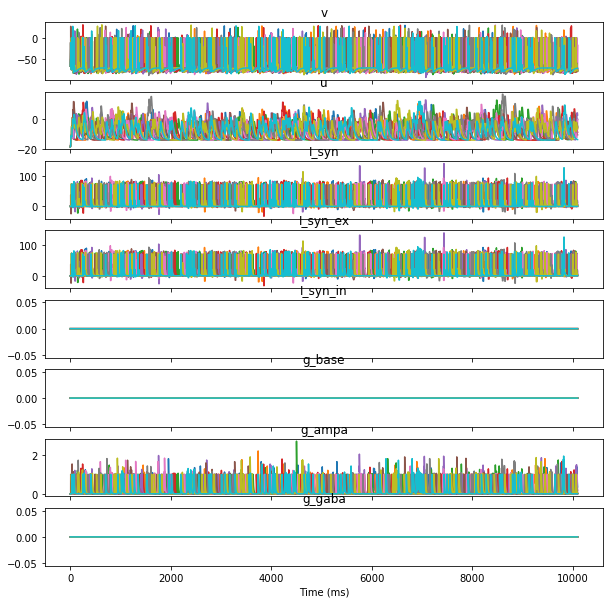

In [14]:
from matplotlib import pyplot
pyplot.close("all")
rate = len(spike_times) / simulation_time * 1000
f1 = pyplot.figure(figsize=(10, 2.5))
pyplot.plot(spike_times-transient, spike_senders, ".")
pyplot.xlabel("Time (ms)")
pyplot.title("Izhikevich Population spikes: %g (Hz)" % rate)
pyplot.show()

inprate= len(spike_times2) / simulation_time * 1000
f3 = pyplot.figure(figsize=(10, 2.5))
pyplot.plot(spike_times2-transient, spike_senders2, ".")
pyplot.xlabel("Time (ms)")
pyplot.title("Input spikes: %g (Hz)" % inprate)
pyplot.show()


f2, axes = pyplot.subplots(n_vars, 1, sharex=True, figsize=(10, 10))
for i_var, var in enumerate(record_from):
    varts = exc1_ts[var]
    axes[i_var].plot(np.arange(ts[var]["start"][0], len(varts)*exc1_m.period, exc1_m.period), varts)
    axes[i_var].set_title(var)
axes[-1].set_xlabel("Time (ms)")
pyplot.show()

In [15]:
params = {}
for attr in exc1.attributes:
    params[attr] = getattr(exc1, attr)
print (params)

{'a': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]), 'b': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]), 'c': array([-72., -72., -72., -72., -72., -72., -72., -72., -72., -72.]), 'd': array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]), 'n0': array([140., 140., 140., 140., 140., 140., 140., 140., 140., 140.]), 'n1': array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]), 'n2': array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]), 'I': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'tau_refrac': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]), 'tau_ampa': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]), 'tau_gaba': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]), 'E_ampa': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'E_gaba': array([-90., -90., -90., -90., -90., -90., -90., -90., -90., -90.]), 'tau_syn': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'C': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'v_th':